In [1]:
import torch
import torchvision
from torchvision import datasets

In [ ]:
'''
food101_train=datasets.Food101(root='food101',split='train',download=True)
food101_test=datasets.Food101(root='food101',split='test',download=True)
'''

In [3]:
effnet_weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT
transforms_food101=effnet_weights.transforms()
effnet_food101=torchvision.models.efficientnet_b2(weights=effnet_weights)

In [4]:

from torchvision import transforms
from torchvision.datasets import ImageFolder

data=ImageFolder(root='food101/food-101/images',transform=transforms_food101)
transforms_food101


ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8044444..2.64].


Text(0.5, 1.0, 'apple_pie')

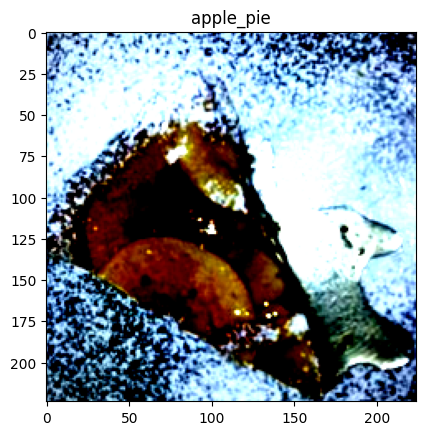

In [ ]:

import matplotlib.pyplot as plt
data.classes[data[0][1]]
plt.imshow(data[0][0].permute(1,2,0).detach().numpy())
plt.title(data.classes[data[0][1]])


In [ ]:

from torch.utils.data import DataLoader
Dataloader_food101=DataLoader(data,batch_size=32,shuffle=True)


In [5]:
num_classes=len(data.classes)
for param in effnet_food101.parameters():
    param.requires_grad=False
effnet_food101.classifier=torch.nn.Linear(in_features=1408,out_features=3)

In [6]:
#create dataloaders

from going_modular import data_setup
from torchvision import transforms

train_dataloader,test_data_loader,class_names=data_setup.create_dataloaders(train_dir='data/pizza_steak_sushi/train',
                              test_dir='data/pizza_steak_sushi/test',
                              batch_size=32,
                              transform=transforms_food101)



In [8]:
from going_modular import engine

results=engine.train(model=effnet_food101,train_dataloader=train_dataloader,test_dataloader=test_data_loader,
                     optimizer=torch.optim.Adam(params=effnet_food101.parameters(),lr=0.001),
                     loss_fn=torch.nn.CrossEntropyLoss(),
                     epochs=5)

 20%|██        | 1/5 [01:37<06:29, 97.49s/it]

Epoch: 0 | Train loss: 0.5532 | Train acc: 0.7891 | Test loss: 0.4783 | Test acc: 0.9176


 40%|████      | 2/5 [03:15<04:52, 97.66s/it]

Epoch: 1 | Train loss: 0.3743 | Train acc: 0.9609 | Test loss: 0.5184 | Test acc: 0.8873


 60%|██████    | 3/5 [04:54<03:16, 98.30s/it]

Epoch: 2 | Train loss: 0.5474 | Train acc: 0.7969 | Test loss: 0.5135 | Test acc: 0.8769


 80%|████████  | 4/5 [06:32<01:38, 98.14s/it]

Epoch: 3 | Train loss: 0.4166 | Train acc: 0.8242 | Test loss: 0.4019 | Test acc: 0.9176


100%|██████████| 5/5 [08:07<00:00, 97.43s/it]

Epoch: 4 | Train loss: 0.3807 | Train acc: 0.8320 | Test loss: 0.4476 | Test acc: 0.9280


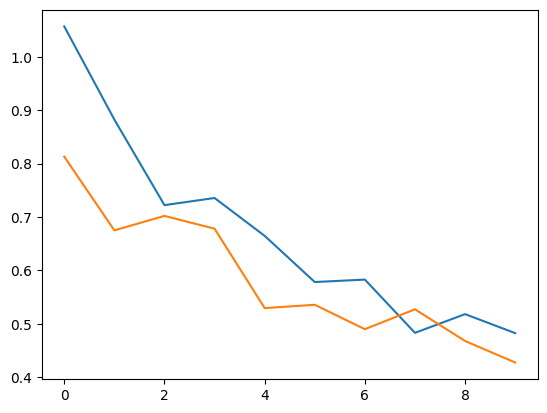

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results["train_loss"],label="train_loss")
plt.plot(results["test_loss"],label="test_loss")

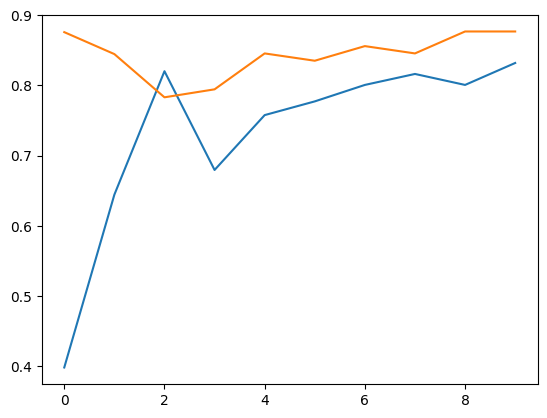

In [ ]:
plt.plot(results["train_acc"],label="train_loss")
plt.plot(results["test_acc"],label="test_loss")

In [ ]:
from pathlib import Path

test_folder = Path("data/pizza_steak_sushi/test")

image_paths = list(test_folder.rglob("*.[jp][pn]g")) 


print(f"Total images found: {len(image_paths)}")
print(image_paths[:5])

Total images found: 75
[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg')]


In [65]:
from PIL import Image

for i in range(5):
    img = Image.open(image_paths[i])
    effnet_food101.eval()
    with torch.inference_mode():
        img_tensor=Image.open(image_paths[i]).convert("RGB")
        img_tensor=transforms_food101(img_tensor)
        model_logits=effnet_food101(img_tensor.unsqueeze(0))
        probs=torch.softmax(model_logits,dim=1)
        pred=torch.argmax(probs,dim=1)
        pred_class=data.classes[pred.item()]
        actual_class=image_paths[i].parent.stem
        print(f"Pred: {pred_class} | Actual: {actual_class}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1408 and 1280x3)